# Import Libraries

In [245]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import our Data Frame We Will be Using

In [246]:
df = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col='id')

# Converting Objects to Numbers

Here we make convert our monetary values and release year values into something useable.

In [247]:
# The following code takes the selected columns, cleans unwanted characters and converts to numbers for mathematical operations
df['production_budget'] = df['production_budget'].map(lambda x: x.strip('$')).str.replace(',','').astype(float) 
df['domestic_gross'] = df['domestic_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
#This splices the last four characters from the release_date column and converts into a number
df['release_year'] = df['release_date'].map(lambda x: int(x[-4:]))
df['release_month'] = df['release_date'].map(lambda x: x[:3])

# Replacing Rows that have no gross info as NA, Then Drop NA's and Duplicates

In [248]:
# Replace 0 as NA
df['worldwide_gross'] = df['worldwide_gross'].replace(0, pd.np.nan) 
# Drop our NA values and duplicate movie titles
df = df.drop_duplicates('movie')
df = df.dropna()

<ipython-input-248-7cbfa914ab9c>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['worldwide_gross'] = df['worldwide_gross'].replace(0, pd.np.nan)


# Setting Up Profit and ROI Columns

We want to get a look at the ROI for each film, so we set up our columns to perform the correct calculations.

In [249]:
#Create our Profit Column by subtracting worldwide gross from budget (Revenue - Cost)
df['profit'] = df['worldwide_gross'] - df['production_budget']
#Create release month date
df['release_month'] = df['release_date'].map(lambda x: x[:3])
#Create ROI column by taking profit and dividng by total gross
df['roi'] = round(((df['profit']/df['worldwide_gross']) * 100), 2)
df = df.sort_values('roi',ascending=False)
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,profit,roi
id,,,,,,,,,
46,"Jun 30, 1972",Deep Throat,25000.0,45000000.0,45000000.0,1972,Jun,44975000.0,99.94
14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,1980,Mar,99550000.0,99.80
93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,2009,Sep,193733034.0,99.77
7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,1999,Jul,247700000.0,99.76
80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,2015,Jul,41556474.0,99.76


Looks like we have some outdated movies, so we decide to look at data from the last 10 years to get a better understanding of more recent trends.

In [250]:
#Look at movies from 2005 and after
filtered_df = df[df['release_year'] >= 2005]

# Grouping Months and Analyzing ROI

In [259]:
# Group data by months
filtered_df = filtered_df.groupby(['release_month']).sum()
# Make our profit column for each month
filtered_df['profit'] = filtered_df['worldwide_gross'] - filtered_df['production_budget']
# Make out ROI column for each month
filtered_df['roi'] = round(((filtered_df['profit']/filtered_df['worldwide_gross']) * 100), 2)
# Find months with the highest ROI
filtered_df = filtered_df.sort_values('roi',ascending=False)


,production_budget,domestic_gross,worldwide_gross,release_year,profit,roi
release_month,,,,,,
Jul,1.164072e+10,1.514798e+10,3.998111e+10,460572,2.834039e+10,70.88
Nov,1.275666e+10,1.602915e+10,4.181617e+10,496825,2.905951e+10,69.49
Jun,1.253675e+10,1.689465e+10,4.100268e+10,488731,2.846593e+10,69.42
May,1.344548e+10,1.576377e+10,4.188109e+10,442529,2.843561e+10,67.90
Dec,1.447034e+10,1.785275e+10,4.442445e+10,653574,2.995411e+10,67.43
Apr,6.918577e+09,8.147263e+09,2.026655e+10,516888,1.334797e+10,65.86
Feb,7.421720e+09,9.307580e+09,2.107643e+10,438553,1.365471e+10,64.79
Mar,1.039097e+10,1.226801e+10,2.781790e+10,520999,1.742693e+10,62.65
Oct,7.019075e+09,7.786050e+09,1.817663e+10,611341,1.115755e+10,61.38


# Create Bar Graph for All months vs ROI

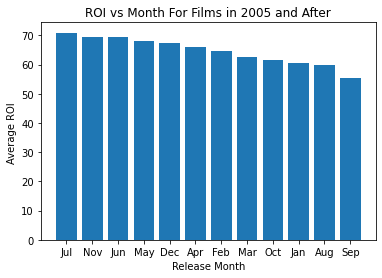

In [267]:
#Create figure and assign axies
fig, ax = plt.subplots()
x = filtered_df.groupby(['release_month']).sum().sort_values('roi',ascending=False).index
ax.bar(x=x , height=filtered_df['roi'] );

ax.set_title('ROI vs Month For Films in 2005 and After')
ax.set_xlabel('Release Month')
ax.set_ylabel('Average ROI ');

plt.savefig('ROI All Months')

From our analysis, the data shows the best month to release a movie is July with an average ROI of 71% while the worst month is September with an average ROI of 56%.

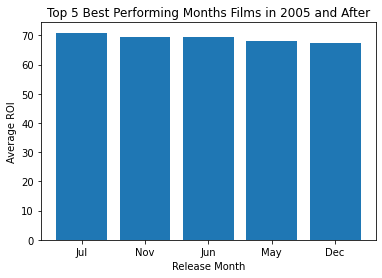

In [268]:
#Create bar graph for top 5 months
fig, ax = plt.subplots()
x = filtered_df.groupby(['release_month']).sum().sort_values('roi',ascending=False).index[:5]
ax.bar(x=x , height=filtered_df['roi'][:5] );
filtered_df;
ax.set_title('Top 5 Best Performing Months Films in 2005 and After')
ax.set_ylabel('Average ROI')
ax.set_xlabel('Release Month');

plt.savefig('Top 5 Months')

# Findings and Recommendation

From the data we were given, our recommendation is to aim for a July release date. This month is shown to have the highest average ROI (71%) for movies released during that period. We think this will give the best return for the movie we decide to release. Avoid releasing a movie in September, as the average ROI for that month is 56%. 